testando previsao OD rio Paraiba do Sul

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

data = pd.read_csv((io.BytesIO(uploaded['rio_Paraiba_do_Sul (2).csv'])), sep=";", decimal=",", header=0)

Saving rio_Paraiba_do_Sul (2).csv to rio_Paraiba_do_Sul (2).csv


In [ ]:
data

,Vaz,Temp,pH,DBO,Cond,NH3,NO3,NO2,Fosf,Turb,SDT,OD
0,11.79,28.0,7.2,3.0,54,0.24,0.10,0.002,0.100,20.0,68.0,5.0
1,11.06,24.0,6.6,3.0,70,0.20,0.17,0.005,0.160,17.0,96.0,4.6
2,7.35,22.0,7.4,2.0,58,0.10,0.10,0.008,0.130,1.5,54.0,6.0
3,6.31,19.0,6.7,1.0,48,0.10,0.10,0.009,0.120,8.0,61.0,7.2
4,4.25,21.0,7.2,1.0,47,0.12,0.16,0.006,0.080,22.0,50.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150,12.25,24.7,6.2,2.0,80,0.50,0.22,0.010,0.007,14.0,50.0,5.1
151,11.97,21.6,6.8,3.0,73,0.50,0.24,0.010,0.032,16.0,50.0,6.4
152,8.01,24.0,6.5,4.0,82,0.50,0.28,0.010,0.052,10.6,50.0,6.6
153,4.05,21.0,7.1,4.0,54,0.50,0.14,0.010,0.007,12.0,50.0,6.0


In [ ]:
data.columns

Index(['Vaz', 'Temp', 'pH', 'DBO', 'Cond', 'NH3', 'NO3', 'NO2', 'Fosf', 'Turb',
       'SDT', 'OD'],
      dtype='object')

In [ ]:
saida = data['OD']

In [ ]:
# geracao da matriz X

X = data.loc[:, ['Vaz', 'Temp', 'pH', 'DBO', 'Cond', 'NH3', 'NO3', 'NO2', 'Fosf', 'Turb',
       'SDT']]

In [ ]:
#escalonamento da matriz X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
from pycaret.regression import *

modelo = setup(data = X2, target = saida, train_size = 0.875, remove_outliers=True, fold = 10)

,Description,Value
0,Session id,2083
1,Target,OD
2,Target type,Regression
3,Original data shape,"(155, 12)"
4,Transformed data shape,"(148, 12)"
5,Transformed train set shape,"(128, 12)"
6,Transformed test set shape,"(20, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()  # erros de calibração

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6860,0.7341,0.8444,0.6194,0.1706,0.1826,0.2860
ada,AdaBoost Regressor,0.7385,0.8146,0.8913,0.5767,0.1783,0.1916,0.1920
rf,Random Forest Regressor,0.7472,0.8467,0.9048,0.5611,0.1843,0.2007,0.5300
lightgbm,Light Gradient Boosting Machine,0.7385,0.8492,0.9006,0.5320,0.1797,0.1916,0.1450
gbr,Gradient Boosting Regressor,0.7809,0.9486,0.9656,0.4807,0.1938,0.2019,0.2890
knn,K Neighbors Regressor,0.7985,1.0528,1.0095,0.4340,0.1969,0.2068,0.0710
xgboost,Extreme Gradient Boosting,0.8160,1.0570,1.0163,0.4336,0.2071,0.2113,0.1030
br,Bayesian Ridge,0.8632,1.1577,1.0621,0.3687,0.2269,0.2288,0.0680
ridge,Ridge Regression,0.8808,1.2489,1.0903,0.3013,0.2233,0.2336,0.0680
lar,Least Angle Regression,0.8897,1.2987,1.1045,0.2689,0.2242,0.2364,0.0690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5706,0.5126,0.7159,0.6447,0.1493,0.1421
1,0.7389,0.8080,0.8989,0.7275,0.1697,0.1875
2,0.7809,0.8739,0.9348,0.3621,0.1467,0.1465
3,0.7981,1.0468,1.0231,0.3634,0.2313,0.2649
4,0.5441,0.3648,0.6039,0.5807,0.1212,0.1300
5,0.8224,0.9428,0.9710,0.7265,0.2263,0.2815
6,0.6585,0.7472,0.8644,0.7551,0.1880,0.1971
7,0.8403,1.0626,1.0308,0.6923,0.2081,0.2346
8,0.5400,0.5314,0.7290,0.5179,0.1324,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_br = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6165,0.5957,0.7718,0.5871,0.1538,0.1518
1,1.0217,1.3586,1.1656,0.5419,0.2448,0.2995
2,0.7651,0.8394,0.9162,0.3873,0.1487,0.1508
3,0.8642,1.2132,1.1015,0.2622,0.2647,0.3291
4,0.5218,0.4023,0.6343,0.5375,0.1290,0.1312
5,0.9872,1.5021,1.2256,0.5643,0.2920,0.3756
6,0.8416,0.9647,0.9822,0.6839,0.2085,0.2467
7,1.1480,1.6736,1.2937,0.5153,0.2512,0.3081
8,0.6309,0.6592,0.8119,0.4020,0.1357,0.1132


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


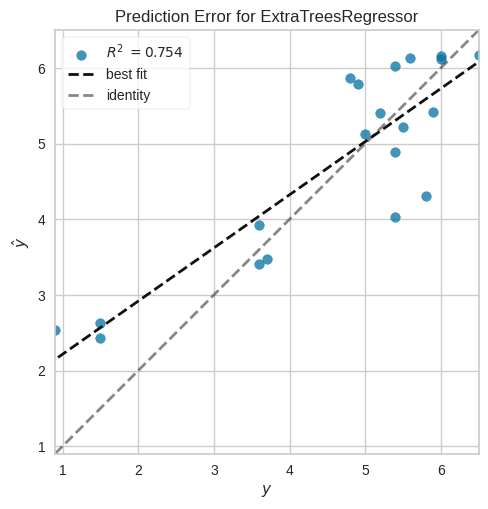

In [ ]:
plot_model(tuned_br, plot = 'error')